In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Comcast_telecom_complaints_data.csv')
df.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.dtypes

Ticket #                               object
Customer Complaint                     object
Date                           datetime64[ns]
Date_month_year                        object
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
dtype: object

- Provide the trend chart for the number of complaints at monthly and daily granularity levels

In [6]:
date_complaint_daily = df['Date'].value_counts().sort_index()

In [7]:
date_complaint_daily

2015-04-01    18
2015-04-02    27
2015-04-03    15
2015-04-04    12
2015-04-05     6
              ..
2015-06-26    55
2015-06-27    39
2015-06-28    27
2015-06-29    51
2015-06-30    53
Name: Date, Length: 91, dtype: int64

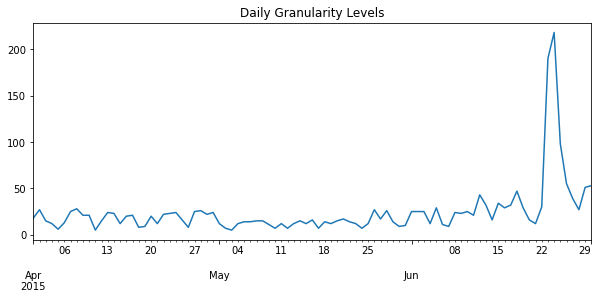

In [14]:
fig,ax = plt.subplots(figsize=(10,4))
date_complaint_daily.plot(kind='line',ax=ax)
plt.title('Daily Granularity Levels')
plt.show()

In [9]:
date_reset = date_complaint_daily.reset_index().rename(columns={'index':'date','Date':'counts'})
date_reset.head()

,date,counts
0,2015-04-01,18
1,2015-04-02,27
2,2015-04-03,15
3,2015-04-04,12
4,2015-04-05,6


In [10]:
date_reset['month'] = date_reset['date'].dt.month_name()

In [31]:
date_reset.head()

,date,counts,month
0,2015-04-01,18,April
1,2015-04-02,27,April
2,2015-04-03,15,April
3,2015-04-04,12,April
4,2015-04-05,6,April


In [34]:
month_complaints = date_reset[['month','counts']].groupby(by='month').sum()
month_complaints

,counts
month,
April,545
June,1280
May,399


<AxesSubplot:xlabel='month'>

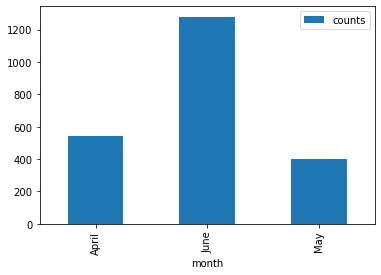

In [35]:
month_complaints.plot(kind='bar')

- Provide a table with the frequency of complaint types.

In [39]:
freq_complaint = df['Customer Complaint'].value_counts().reset_index().rename(
    columns={'index':'Customer Complaint','Customer Complaint':'frequency'})
freq_complaint.head()

,Customer Complaint,frequency
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Data Caps,11


- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [41]:
df['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [42]:
df['Status'].replace(['Closed', 'Open', 'Solved', 'Pending'],
                     ['Closed', 'Open', 'Closed', 'Open'],inplace=True)

In [44]:
df['Status'].value_counts()

Closed    1707
Open       517
Name: Status, dtype: int64

- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

In [53]:
status_open = df[['State','Status','Ticket #']].groupby(by=['State','Status']).count()
status_state  = status_open.unstack()

In [65]:
status_state.head()

Ticket #      
Status       Closed  Open
State                    
Alabama        17.0   9.0
Arizona        14.0   6.0
Arkansas        6.0   0.0
California    159.0  61.0
Colorado       58.0  22.0

In [55]:
status_state.fillna(0,inplace=True)

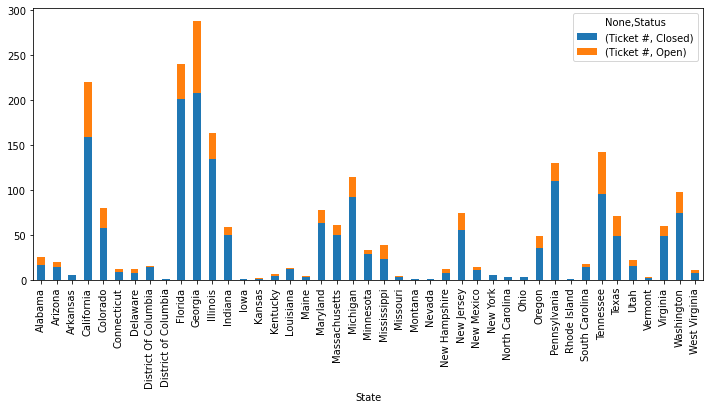

In [62]:
fig,ax = plt.subplots(figsize=(12,5))
status_state.plot(kind='bar',stacked=True,ax=ax)
plt.show()


- Which state has the maximum complaints

In [71]:
df['State'].value_counts().head(1)

Georgia    288
Name: State, dtype: int64

- Which state has the highest percentage of unresolved complaints

In [72]:
status_state.head()

Ticket #      
Status       Closed  Open
State                    
Alabama        17.0   9.0
Arizona        14.0   6.0
Arkansas        6.0   0.0
California    159.0  61.0
Colorado       58.0  22.0

In [73]:
status_state.keys()

MultiIndex([('Ticket #', 'Closed'),
            ('Ticket #',   'Open')],
           names=[None, 'Status'])

In [74]:
status_state['total'] = status_state[('Ticket #', 'Closed')]+ status_state[('Ticket #',   'Open')]
status_state.head()

Ticket #        total
Status       Closed  Open       
State                           
Alabama        17.0   9.0   26.0
Arizona        14.0   6.0   20.0
Arkansas        6.0   0.0    6.0
California    159.0  61.0  220.0
Colorado       58.0  22.0   80.0

In [76]:
status_state['unresolved%'] = status_state[('Ticket #',   'Open')]*100/status_state['total']
status_state.head()

Ticket #        total unresolved%
Status       Closed  Open                   
State                                       
Alabama        17.0   9.0   26.0   34.615385
Arizona        14.0   6.0   20.0   30.000000
Arkansas        6.0   0.0    6.0    0.000000
California    159.0  61.0  220.0   27.727273
Colorado       58.0  22.0   80.0   27.500000

In [78]:
status_state.sort_values(by='unresolved%',ascending=False).head()

Ticket #       total unresolved%
Status        Closed  Open                  
State                                       
Kansas           1.0   1.0   2.0   50.000000
Kentucky         4.0   3.0   7.0   42.857143
Mississippi     23.0  16.0  39.0   41.025641
Maine            3.0   2.0   5.0   40.000000
Alabama         17.0   9.0  26.0   34.615385

Kansas has highest percentage of unresolved% which is 50%